In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import cv2

In [3]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import os
# print(os.listdir("../input"))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path="/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/train/"

In [6]:
def img_to_array(path, category_no, X, y):
    for p in os.listdir(path):
        if p == ".DS_Store":
            continue
        #print(p)
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        y.append(category_no)

In [7]:
path_train="/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/train/"


category_list = ["NORMAL", "PNEUMONIA"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)
    
X_train = np.array(X_train).reshape(-1,150,150,1)
y_train = np.array(y_train)

In [8]:
path_val = "/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/val/"

X_val = []
y_val = []

for i in range(len(category_list)):
    img_to_array(path_val + category_list[i], i, X_val, y_val)
    
X_val = np.array(X_val).reshape(-1,150,150,1)
y_val = np.array(y_val)

In [9]:
path_test = "/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/test/"

category_list = ["NORMAL", "PNEUMONIA"]
X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)
    
X_test = np.array(X_test).reshape(-1,150,150,1)
y_test = np.array(y_test)

In [10]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [11]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip = False)  # randomly flip images


datagen.fit(X_train)

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation = "sigmoid"))

In [ ]:
'''
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
]) '''

In [50]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 50,validation_data = datagen.flow(X_val, y_val))

Epoch 1/50
163/163 [==============================] - 16s 90ms/step - loss: 0.5261 - accuracy: 0.7492 - val_loss: 0.8451 - val_accuracy: 0.5625
Epoch 2/50
163/163 [==============================] - 14s 89ms/step - loss: 0.3578 - accuracy: 0.8317 - val_loss: 1.1171 - val_accuracy: 0.5625
Epoch 3/50
163/163 [==============================] - 15s 89ms/step - loss: 0.3181 - accuracy: 0.8639 - val_loss: 0.7015 - val_accuracy: 0.8125
Epoch 4/50
163/163 [==============================] - 15s 89ms/step - loss: 0.2794 - accuracy: 0.8817 - val_loss: 0.5961 - val_accuracy: 0.6250
Epoch 5/50
163/163 [==============================] - 15s 90ms/step - loss: 0.2443 - accuracy: 0.9013 - val_loss: 0.8948 - val_accuracy: 0.6875
Epoch 6/50
163/163 [==============================] - 14s 88ms/step - loss: 0.2246 - accuracy: 0.9118 - val_loss: 1.4263 - val_accuracy: 0.5625
Epoch 7/50
163/163 [==============================] - 14s 88ms/step - loss: 0.2008 - accuracy: 0.9176 - val_loss: 1.0281 - val_accuracy:

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [53]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

20/20 [==============================] - 1s 20ms/step - loss: 0.3349 - accuracy: 0.8926
Accuracy: 89.26


In [54]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [55]:
 train_auc_name = list(history.history.keys())[3]
 val_auc_name = list(history.history.keys())[1]
 train_auc = history.history[train_auc_name]
val_auc = history.history[val_auc_name]

In [56]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(directory = path_test, 
                                                 target_size = (150, 150),
                                                 batch_size = 32, 
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle=False,
                                                 seed = 42)

Found 624 images belonging to 2 classes.


In [57]:
   y_true = test_generator.classes
   Y_pred = model.predict_generator(test_generator, steps = len(test_generator))
   y_pred = (Y_pred > 0.5).T[0]
   y_pred_prob = Y_pred.T[0]

In [58]:
fig = plt.figure(figsize=(123, 120))


<Figure size 8856x8640 with 0 Axes>

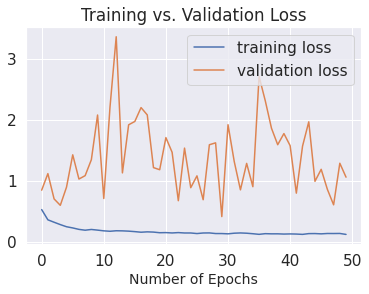

In [59]:
   ## PLOT 1: TRAIN VS. VALIDATION LOSS 
#plt.subplot(12,12,11)
plt.title("Training vs. Validation Loss")
plt.plot(train_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.xlabel("Number of Epochs", size=14)
plt.legend()

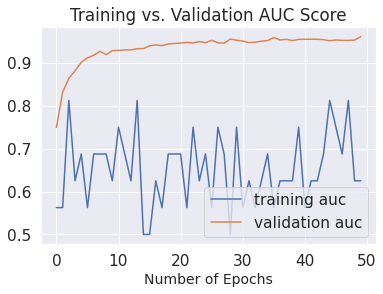

In [60]:
## PLOT 2: TRAIN VS. VALIDATION AUC
    #plt.subplot(2,2,2)
plt.title("Training vs. Validation AUC Score")
plt.plot(train_auc, label='training auc')
plt.plot(val_auc, label='validation auc')
plt.xlabel("Number of Epochs", size=14)
plt.legend()

In [61]:
   ## PLOT 3: CONFUSION MATRIX
    #plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
cm = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['Normal', 'Pneumonia']

Text(25.499999999999993, 0.5, 'Actual')

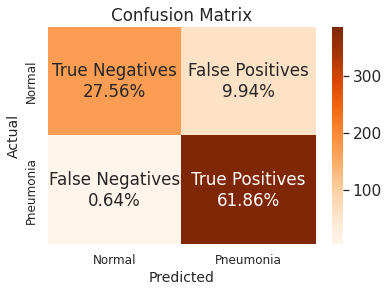

In [62]:
    # Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True)

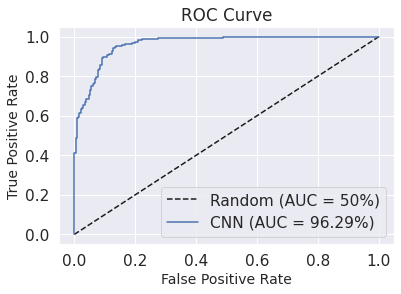

In [63]:
    ## PLOT 4: ROC CURVE
    #plt.subplot(2,2,4)
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)

In [64]:
    ## Summary Statistics
TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

[Summary Statistics]
Accuracy = 89.42% | Precision = 86.16% | Recall = 98.97% | Specificity = 73.50% | F1 Score = 92.12%
